<h1 style="color:gray;text-align:center">WINE DATA SET</h1>
<h2 style="color:gray;text-align:center"><a href="http://archive.ics.uci.edu/ml/datasets/Wine">UCI Machine Learning Repository</a></h2>
<hr>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def pca_results(df, pca):
    # Create labels for PCA components
    dimensions = ['Component %s'%(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(pca.components_, columns = df.columns)
    components.index = dimensions

    # Create plot ready dataframe for PCA components and weights of features 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(18,6))
    
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=5, fancybox=True, shadow=True)
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Show explained variance labels
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.30, ax.get_ylim()[1] + 0.01, "Explained Variance\n          %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

In [3]:
df = pd.read_csv('wine.data',header=None,names=["Actual Label","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])
df.head()

,Actual Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

<h3 style="color:gray;text-align:center">Normalize data before PCA</h3>

In [5]:
df_normalized = df.iloc[:,1:]
df_normalized = (df_normalized - df_normalized.mean())/df_normalized.std()
df_normalized.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [6]:
covariance_df = PCA(n_components = 13,svd_solver='full')
covariance_df.fit(df_normalized)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [7]:
cumu = np.cumsum(covariance_df.explained_variance_ratio_)
cumu

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

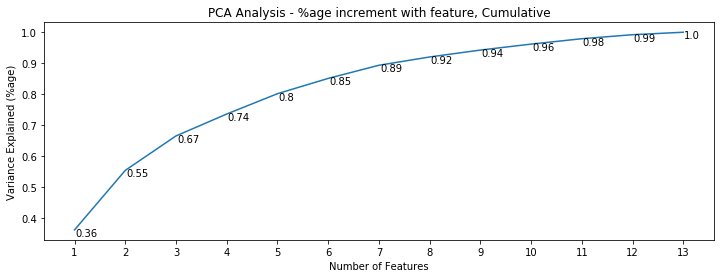

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
plt.ylabel('Variance Explained (%age)')
plt.xlabel('Number of Features')
plt.title('PCA Analysis - %age increment with feature, Cumulative')
plt.xticks(np.arange(1,14,1.0))
for i,j in zip(np.arange(1,14),cumu):
    ax.annotate(str(round(j,2)),xy=(i+0.02,j-0.02))
plt.plot(range(1,14),cumu)

<Figure size 432x288 with 0 Axes>

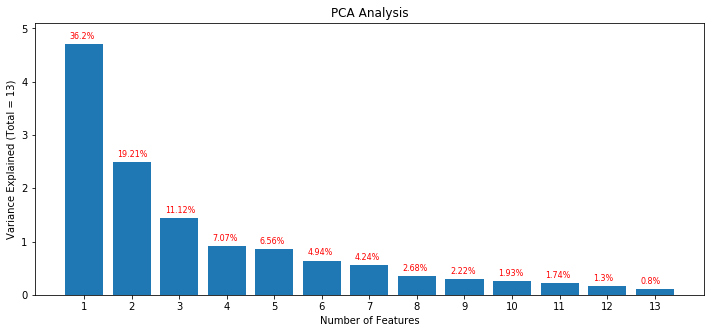

In [9]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,5))
plt.ylabel('Variance Explained (Total = 13)')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(1,14,1.0))
ax.set_ylim([0,5.1])
plt.bar(range(1,14),covariance_df.explained_variance_)
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+.1, \
            str(round(100*i.get_height()/13,2))+"%",\
            fontsize=8,color='red')

<p style="color:gray;font-size:18px;">We note that by around <span class='code'>5</span>, the PCA components explain <span class='code'>80%</span> of the total variation in features. Next, we look at the weights of individual original features that combine to create a Principal Component.</p>

In [10]:
pca = PCA(n_components=5,svd_solver='full')
pca.fit(df_normalized)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [11]:
display(pd.DataFrame(pca.components_,columns=list(df_normalized.columns)))

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


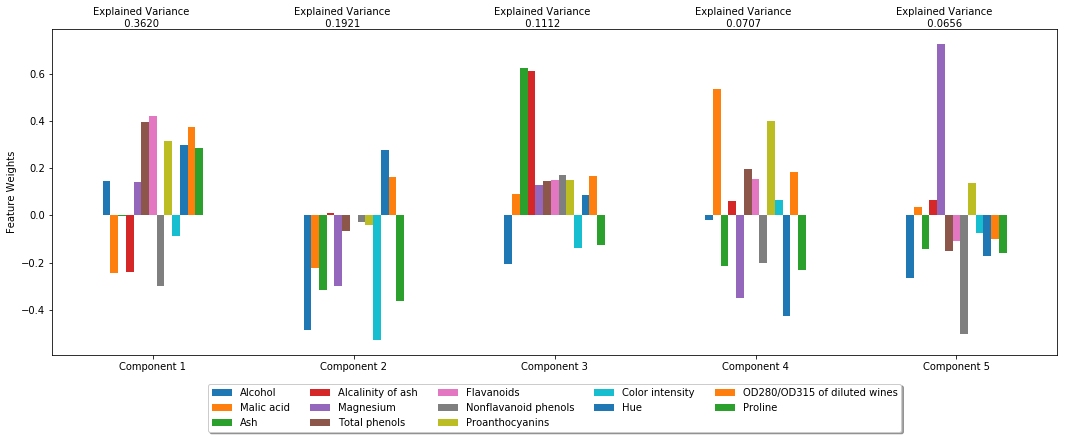

In [12]:
pca_results = pca_results(df_normalized, pca)

<hr>
<h1 style="color:gray;text-align: center">NOTES</h1>
<hr>
<hr>
<div style="color:gray;text-align:justify">
<p style="font-size:18px;">Since these 5 components encompass a mix of features in each one of them, we will talk about the top 3 components and the feature-mix they represent.</p>
<hr>
<p style="font-size:16px;">PCA Component 1 has strong positive correlation with Flavanoids, Phenols and Hue, while having strong negative correlation with NonFlavanoid Phenols. Also, high Anthocyanins are typical characteristics responsible for flavouring in red wines. This can be interpreted as component indicating <b>color of wine</b></p> 
<p style="font-size:16px;">PCA Component 2 has strong negative correlation with Alcohol, Color Intensity and Proline, while having moderately positive with Hue and Diluted wines. High Proline and alcohol is related with bitterness and taste. However, proline contents varies in grapes from region to region. Let's interpret this component as <b>taste and origin of wine</b></span></p>
<p style="font-size:16px;">PCA Component 3 characterizes high positive weights on Ash content and Alkalinity and negative weight on Alcohol content. Usually, wines with high Ash content are not considered good. So, let's label this component as determinant of <b>quality of wine</b>.</p>
<hr>
</div>

In [13]:
from scipy.cluster import hierarchy

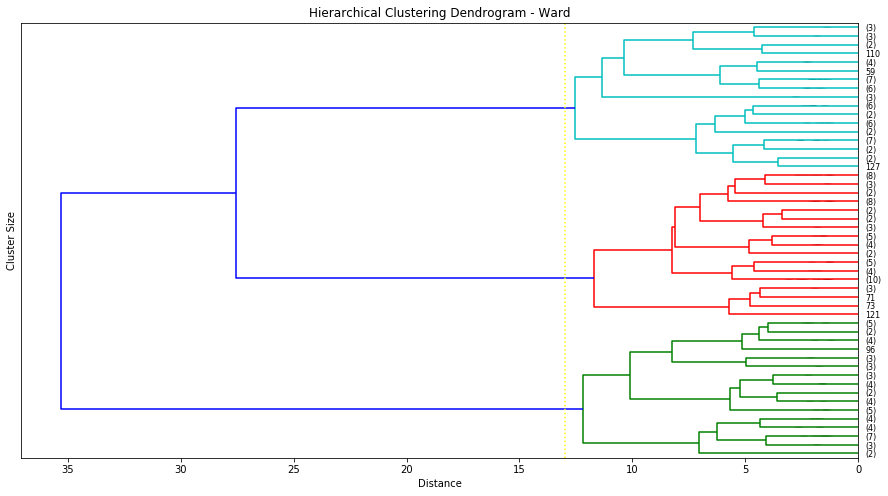

In [15]:
z = hierarchy.linkage(df_normalized,metric='euclidean',method='ward')
fig, ax = plt.subplots(figsize=(15,8))
clusters = hierarchy.dendrogram(z, truncate_mode='lastp',p=50,orientation='left',leaf_font_size=8,show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram - Ward')
plt.ylabel('Cluster Size')
plt.xlabel('Distance')
plt.axvline(x=13,linestyle=':',c='yellow')
plt.show()

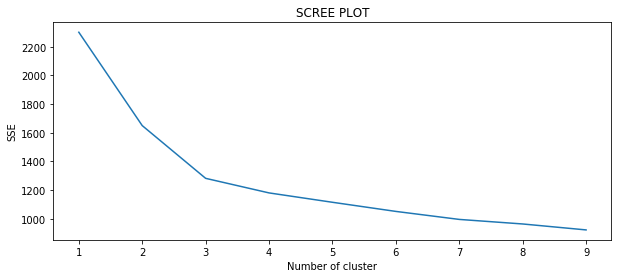

In [16]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_normalized)
    df_normalized["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

fig, ax = plt.subplots(figsize=(10,4))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("SCREE PLOT")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [17]:
df_normalized = df_normalized.iloc[:,:-1]
df_normalized.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [18]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(df_normalized)
df_normalized["kmeans_clusters"] = kmeans.labels_

In [19]:
df_normalized['hierarchical_clusters'] = hierarchy.fcluster(z,13,criterion='distance')

In [20]:
df_normalized['Actual_label'] = df['Actual Label']

Text(-0.936362,-0.390863,'2')

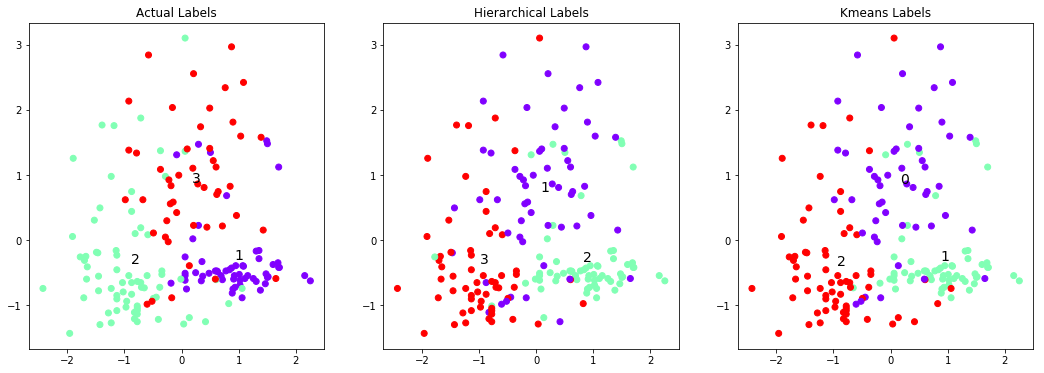

In [21]:
fig = plt.figure(figsize=(18,6))
ax = fig.subplots(nrows=1, ncols=3)

plt.subplot(1, 3, 1)
plt.scatter(df_normalized.iloc[:,0],df_normalized.iloc[:,1], c=df_normalized.iloc[:,-1], cmap='rainbow')
plt.title('Actual Labels')
plt.annotate('1',xy=(np.mean(df_normalized[df_normalized['Actual_label']==1].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['Actual_label']==1].iloc[:,1])),fontsize=14)
plt.annotate('2',xy=(np.mean(df_normalized[df_normalized['Actual_label']==2].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['Actual_label']==2].iloc[:,1])),fontsize=14)
plt.annotate('3',xy=(np.mean(df_normalized[df_normalized['Actual_label']==3].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['Actual_label']==3].iloc[:,1])),fontsize=14)

plt.subplot(1, 3, 2)
plt.scatter(df_normalized.iloc[:,0],df_normalized.iloc[:,1], c=df_normalized.iloc[:,-2], cmap='rainbow')
plt.title('Hierarchical Labels')
plt.annotate('1',xy=(np.mean(df_normalized[df_normalized['hierarchical_clusters']==1].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['hierarchical_clusters']==1].iloc[:,1])),fontsize=14)
plt.annotate('2',xy=(np.mean(df_normalized[df_normalized['hierarchical_clusters']==2].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['hierarchical_clusters']==2].iloc[:,1])),fontsize=14)
plt.annotate('3',xy=(np.mean(df_normalized[df_normalized['hierarchical_clusters']==3].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['hierarchical_clusters']==3].iloc[:,1])),fontsize=14)

plt.subplot(1, 3, 3)
plt.scatter(df_normalized.iloc[:,0],df_normalized.iloc[:,1], c=df_normalized.iloc[:,-3], cmap='rainbow')
plt.title('Kmeans Labels')
plt.annotate('0',xy=(np.mean(df_normalized[df_normalized['kmeans_clusters']==0].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['kmeans_clusters']==0].iloc[:,1])),fontsize=14)
plt.annotate('1',xy=(np.mean(df_normalized[df_normalized['kmeans_clusters']==1].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['kmeans_clusters']==1].iloc[:,1])),fontsize=14)
plt.annotate('2',xy=(np.mean(df_normalized[df_normalized['kmeans_clusters']==2].iloc[:,0]),\
                             np.mean(df_normalized[df_normalized['kmeans_clusters']==2].iloc[:,1])),fontsize=14)

<div style="color:gray;text-align:justify">
<p style="font-size:16px;">From the above plot we note that For Actual, Hierarchical and Kmeans, cluster labels (1,2,1),(2,3,2) and (3,1,0), respectively are equivalent. Let's find the accuracy numerically.</p>
<hr>
</div>

In [22]:
labels = pd.DataFrame(df_normalized['Actual_label'],columns=['Actual_label'])
labels['Hierarchichal'] = df_normalized['hierarchical_clusters'].replace({2:1,3:2,1:3})
labels['Kmeans'] = df_normalized['kmeans_clusters'].replace({1:1,2:2,0:3})

In [23]:
print("Hierarchical Accuracy %s"%(100*np.sum(labels.Actual_label == labels.Hierarchichal)/labels.shape[0])+"%")
print("Kmeans Accuracy %s"%(100*np.sum(labels.Actual_label == labels.Kmeans)/labels.shape[0])+"%")

Hierarchical Accuracy 92.69662921348315%
Kmeans Accuracy 97.19101123595506%


<hr>
<div style="color:gray;text-align:justify">
<p style="font-size:16px;">Since Kmeans accuracy is better, we use it further.</p>
<hr>
</div>

In [24]:
from pandas.plotting import parallel_coordinates

def df_for_plotting_centroids(df, label_col_name, n_clusters):
    assert n_clusters > 0
    temp = df[df[label_col_name] == 0].iloc[:,:-1].mean()
    result = pd.DataFrame({'features':temp.index})
    result['cluster_1'] = temp.values
    for i in range(n_clusters):
        result['cluster_%s'%(i+1)] = df[df[label_col_name] == i].iloc[:,:-1].mean().values
    trans = result.transpose()
    trans.columns = trans.iloc[0,:].values
    trans = trans.iloc[1:,:]
    trans['elements'] = trans.index.values
    return trans

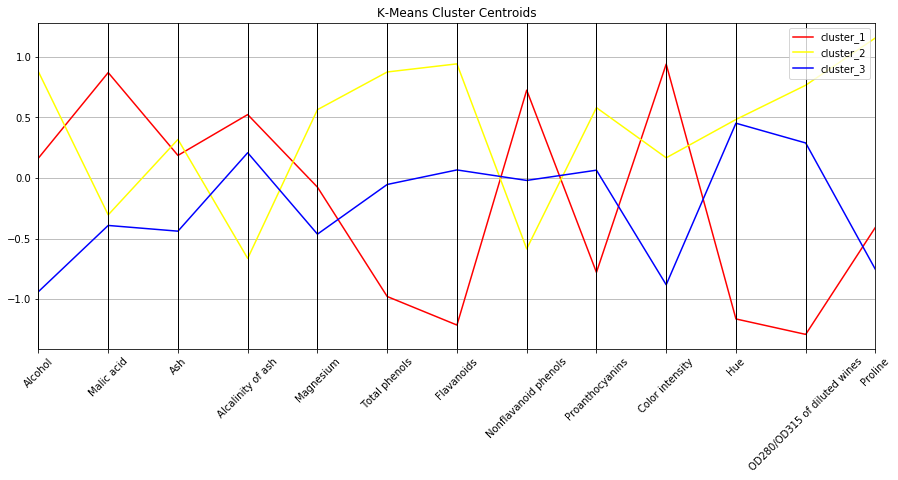

In [25]:
plot_4_centroids = df_for_plotting_centroids(df_normalized.iloc[:,:-2],'kmeans_clusters',3)
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("K-Means Cluster Centroids")
parallel_coordinates(plot_4_centroids,"elements",color=('red', 'yellow', 'blue'))
plt.xticks(rotation=45)
plt.show()

<hr>
<h1 style="color:gray;text-align: center">NOTES</h1>
<hr>
<hr>
<div style="color:gray;text-align:justify">
<p style="font-size:18px;">We note that K-Means is producing better results than Hierarchical as we saw above.</p>
<hr>
<p style="font-size:16px;">Cluster 2 has high Malic Acid, Alcalinity of ash, Nonflavonoid phenols, Color intensity, while low Total phenols, Flavonoinds, Proanthocyanins, Hue, OD280/OD315 of diluted wines. This cluster looks like a bunch of datapoints which have low values of PCA component 1.</p>
<p style="font-size:16px;">Cluster 3 has high Hue while low Alcohol, Color, Proline. This cluster looks like a bunch of datapoints which have high values of PCA component 2.</p>
<hr>
</div>

In [26]:
pca = PCA(n_components=2,svd_solver='full')

pcs = pca.fit_transform(df_normalized.iloc[:,:-3])
df_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
df_pca.head()

,pc1,pc2
0,3.307421,-1.439402
1,2.203250,0.332455
2,2.509661,-1.028251
3,3.746497,-2.748618
4,1.006070,-0.867384


<hr>
<div style="color:gray;text-align:justify">
<p style="font-size:16px;">Apply K-means on PCA components</p>
<hr>
</div>

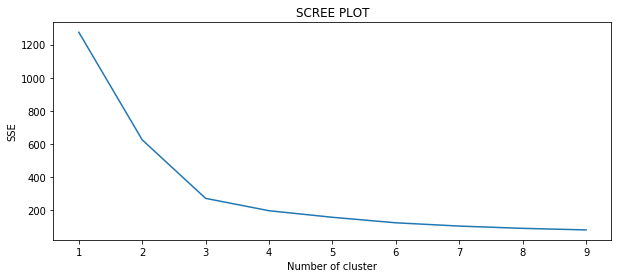

In [27]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_pca)
    df_pca["kmeans_clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

fig, ax = plt.subplots(figsize=(10,4))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("SCREE PLOT")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<hr>
<div style="color:gray;text-align:justify">
<p style="font-size:16px;">3 looks like the clear choice here for number of clusters</p>
<hr>
</div>

In [28]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(df_pca)
df_pca["kmeans_clusters"] = kmeans.labels_

In [29]:
df_pca["Actual_label"] = df_normalized["Actual_label"]

Text(2.26429,-0.483954,'2')

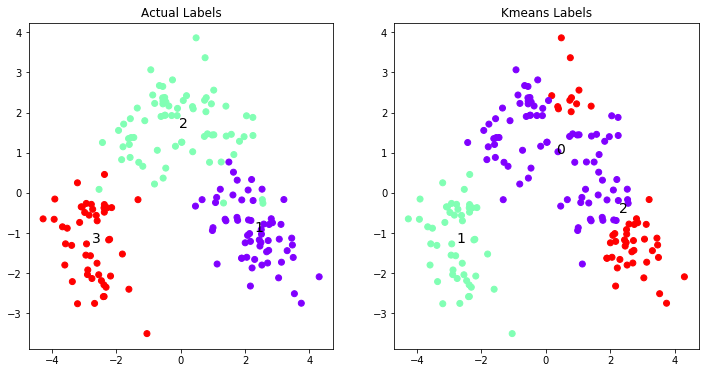

In [30]:
fig = plt.figure(figsize=(12,6))
ax = fig.subplots(nrows=1, ncols=2)

plt.subplot(1, 2, 1)
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1], c=df_normalized.iloc[:,-1], cmap='rainbow')
plt.title('Actual Labels')
plt.annotate('1',xy=(np.mean(df_pca[df_pca['Actual_label']==1].iloc[:,0]),\
                             np.mean(df_pca[df_pca['Actual_label']==1].iloc[:,1])),fontsize=14)
plt.annotate('2',xy=(np.mean(df_pca[df_pca['Actual_label']==2].iloc[:,0]),\
                             np.mean(df_pca[df_pca['Actual_label']==2].iloc[:,1])),fontsize=14)
plt.annotate('3',xy=(np.mean(df_pca[df_pca['Actual_label']==3].iloc[:,0]),\
                             np.mean(df_pca[df_pca['Actual_label']==3].iloc[:,1])),fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1], c=df_pca.iloc[:,-2], cmap='rainbow')
plt.title('Kmeans Labels')
plt.annotate('0',xy=(np.mean(df_pca[df_pca['kmeans_clusters']==0].iloc[:,0]),\
                             np.mean(df_pca[df_pca['kmeans_clusters']==0].iloc[:,1])),fontsize=14)
plt.annotate('1',xy=(np.mean(df_pca[df_pca['kmeans_clusters']==1].iloc[:,0]),\
                             np.mean(df_pca[df_pca['kmeans_clusters']==1].iloc[:,1])),fontsize=14)
plt.annotate('2',xy=(np.mean(df_pca[df_pca['kmeans_clusters']==2].iloc[:,0]),\
                             np.mean(df_pca[df_pca['kmeans_clusters']==2].iloc[:,1])),fontsize=14)

In [31]:
labels = pd.DataFrame(df_pca['Actual_label'],columns=['Actual_label'])
labels['Kmeans'] = df_pca['kmeans_clusters'].replace({2:1,0:2,1:3})

print("Kmeans Accuracy %s"%(100*np.sum(labels.Actual_label == labels.Kmeans)/labels.shape[0])+"%")

Kmeans Accuracy 79.7752808988764%


<hr>
<h1 style="color:gray;text-align: center">NOTES</h1>
<hr>
<div style="color:gray;text-align:justify">
<p style="font-size:14px;">With an accuracy of 96.6292% on Full-feature set, we can say that the clusters are well-separable. However, on the set of first two PCA components, we notice a drop in accuracy to 79.7753%. This is because these two PCA components cover only 55% of the total variation.</p>
<hr>
<p style="font-size:14px;">I went with 3 clusters since there was strong support from both Hierarchical Clustering and K-Means Scree Plot.</p>
<hr>
</div>

In [33]:
selected_measurements = df_normalized[["Total phenols","Flavanoids","OD280/OD315 of diluted wines","Nonflavanoid phenols","Proanthocyanins","Color intensity","Alcohol"]]
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(selected_measurements)
selected_measurements["kmeans_clusters"] = kmeans.labels_
non_selected_measurements = df_normalized[['Malic acid','Ash','Alcalinity of ash','Magnesium','Hue','Proline']]
non_selected_measurements["kmeans_clusters"] = selected_measurements["kmeans_clusters"]

c:\users\ke381281.wipro\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ke381281.wipro\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


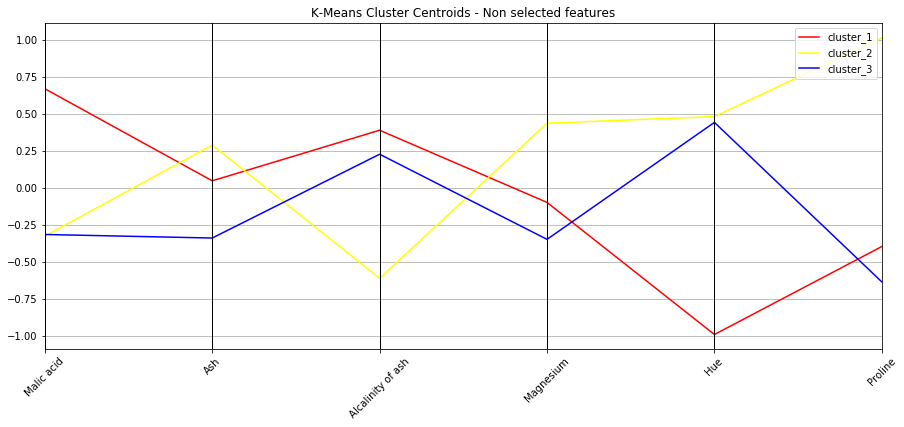

In [34]:
plot_4_centroids = df_for_plotting_centroids(non_selected_measurements,'kmeans_clusters',3)
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("K-Means Cluster Centroids - Non selected features")
parallel_coordinates(plot_4_centroids,"elements",color=('red', 'yellow', 'blue'))
plt.xticks(rotation=45)
plt.show()

<hr>
<h1 style="color:gray;text-align: center">REFERENCES</h1>
<hr>
<div style="color:gray;text-align:justify">
<p style="font-size:18px;">
<ul>
<li>https://en.wikipedia.org/wiki/Wine_chemistry</li>
<li>https://winefolly.com/review/understanding-acidity-in-wine/</li>
<li>http://www.wineanorak.com/polyphenols_in_wine.htm</li>
<li>https://www.vitis-vea.de/admin/volltext/e054492.pdf</li>
<li>http://www.mdpi.com/journal/molecules/special_issues/wine-chemistry</li></ul></p>
<hr>
</div>
